In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


In [3]:
def read_Dataset():
    daTaset = "file:///home/docode/project/googleplaystore.csv"
    boston_Df = pd.read_csv(daTaset)
    return boston_Df

In [4]:
df = read_Dataset()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
def clean_dataset(ds):
    # Remove rows with missing values and create a copy to avoid SettingWithCopyWarning
    cLeaned_Df = ds.dropna().copy()
    
    # Convert 'Reviews' to numeric
    cLeaned_Df['Reviews'] = pd.to_numeric(cLeaned_Df['Reviews'], errors='coerce')
    
    # Handle 'Installs' column
    cLeaned_Df['Installs'] = cLeaned_Df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
    
    # Convert 'Price' to numeric
    cLeaned_Df['Rating'] = cLeaned_Df['Rating'].astype(float)
    
    # Convert 'Category' to string
    cLeaned_Df['Category'] = cLeaned_Df['Category'].str.strip().astype("string")
    
    # Convert 'Type' to string
    cLeaned_Df['Type'] = cLeaned_Df['Type'].astype("string")
    
    
    # Convert 'Price' to numeric
    cLeaned_Df['Price'] = cLeaned_Df['Price'].str.replace('$', '', regex=False).astype(float)
    
    # Standardize date format in 'Last Updated'
    cLeaned_Df['Last Updated'] = pd.to_datetime(cLeaned_Df['Last Updated'])
    
    return cLeaned_Df


In [6]:
d_F = read_Dataset()
cleaned_Df = clean_dataset(d_F)
cleaned_Df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [7]:
def print_summarize_dataset(cLeaned_Df):
    print("Dataset dimension:")
    print(cLeaned_Df.shape)
    print()
    print("First 10 rows of dataset:")
    print(cLeaned_Df.head(10))
    print()
    print("Statistical summary:")
    print(cLeaned_Df.describe())


In [7]:
d_F = read_Dataset()
cleaned_Df = clean_dataset(d_F)
sumrze_data = print_summarize_dataset(cleaned_Df)

Dataset dimension:
(9360, 13)

First 10 rows of dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

   Reviews  Size  Installs  Type  Price Content Rating  \
0   

In [8]:
def print_histograms(cLeaned_Df):
    # Select only the numerical columns
    numerical_clmns = cLeaned_Df.select_dtypes(include=['number']).columns
    
    # Create a histogram for each numerical column
    for clmn in numerical_clmns:
        plt.figure(figsize=(10, 6))
        plt.hist(cLeaned_Df[clmn].dropna(), bins=50, edgecolor='black')
        plt.title(f'Histogram of {clmn}')
        plt.xlabel(clmn)
        plt.grid(True)
        plt.show()

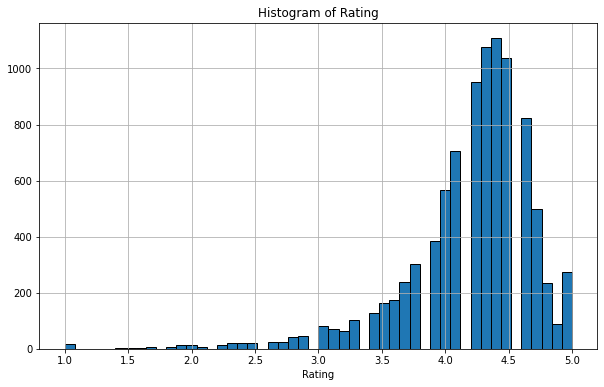

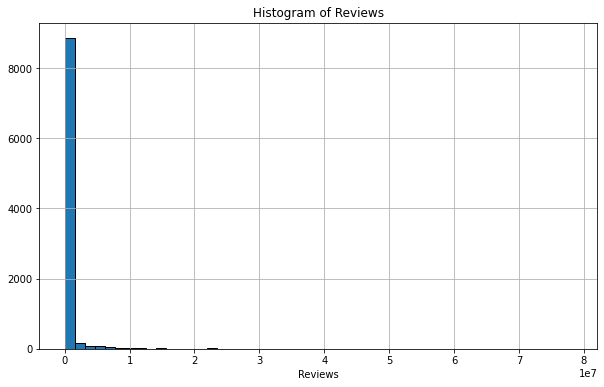

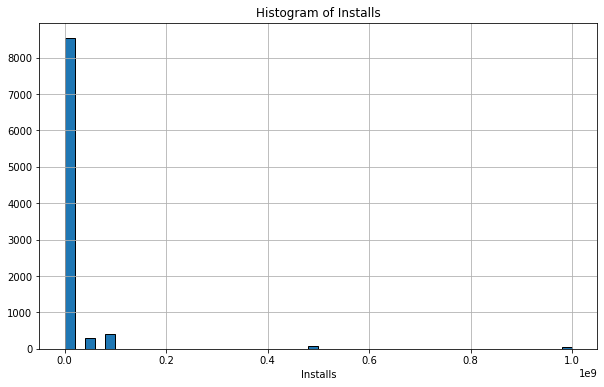

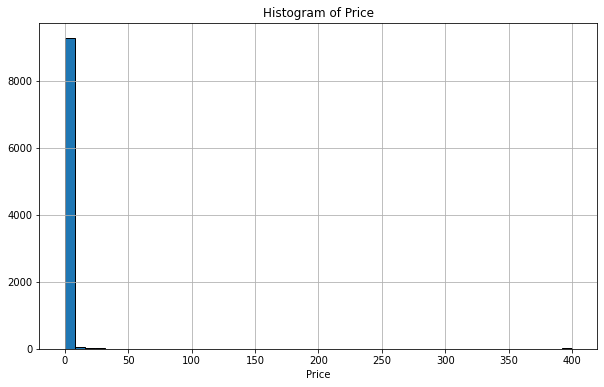

In [9]:
d_F = read_Dataset()
cleaned_Df = clean_dataset(d_F)
prnt_Hist = print_histograms(cleaned_Df)


In [10]:
def compute_correLations_matrix(cLeaned_Df):
    corr_maTrx = cLeaned_Df.corr()
    return corr_maTrx


In [11]:
d_F = read_Dataset()
cleaned_Df = clean_dataset(d_F)
corr_mtrx = compute_correLations_matrix(cleaned_Df)
corr_mtrx

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068133,0.051337,-0.021919
Reviews,0.068133,1.000000,0.641605,-0.009824
Installs,0.051337,0.641605,1.000000,-0.011895
Price,-0.021919,-0.009824,-0.011895,1.000000


In [12]:
def print_scatter_matrix(cLeaned_Df):
    # Create the scatter matrix plot
    scatter_matrix(cLeaned_Df,figsize = (15,15), s = 500)
    
    # Set the title of the plot
    plt.suptitle('Scatter Matrix of Dataset', y=1.02)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()


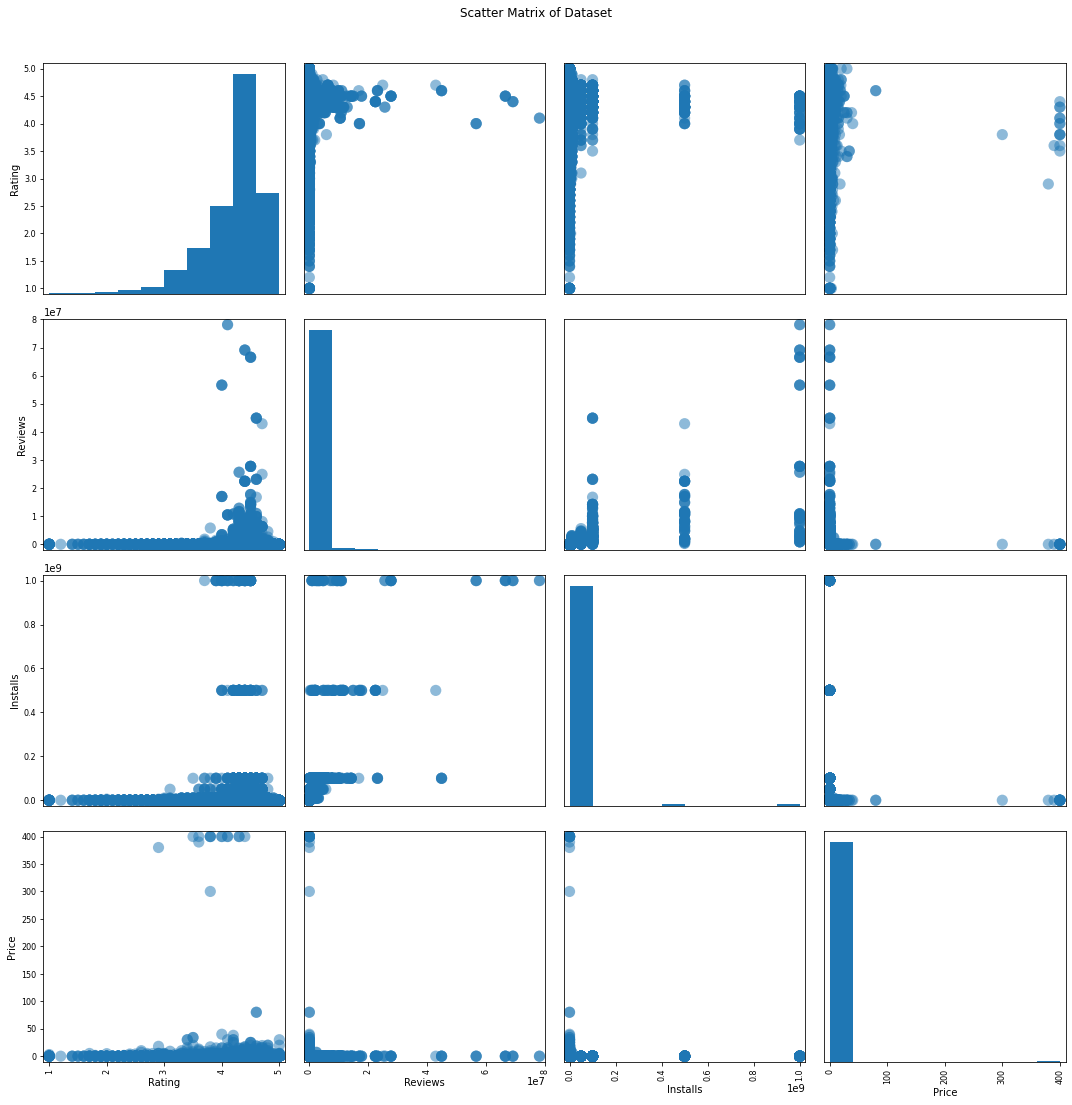

In [16]:
d_F = read_Dataset()
cleaned_Df = clean_dataset(d_F)
scatter_plt =  print_scatter_matrix(cleaned_Df)

In [13]:
def most_popuLar_paid_apps_Family_cat(cLeaned_Df):
    # Filter for Family category and paid apps
    fiLtered_pd_Fam_Df = cLeaned_Df[(cLeaned_Df["Category"] == "FAMILY") &
        (cLeaned_Df["Type"] == "Paid")]
    
    # Sort by Rating or another column that indicates popularity
    sort_rt_Df = fiLtered_pd_Fam_Df.sort_values(by="Rating", ascending=False)
    # Select the top 10 apps
    top_10_apps = sort_rt_Df.head(10)
    # Plot the top 10 most popular apps
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Rating", y="App", data=sort_rt_Df.head(10), palette="viridis")
    
    plt.title('Top 10 Most Popular Paid Apps in Family Category')
    plt.xlabel('Rating')
    plt.ylabel('App Name')
    plt.show()


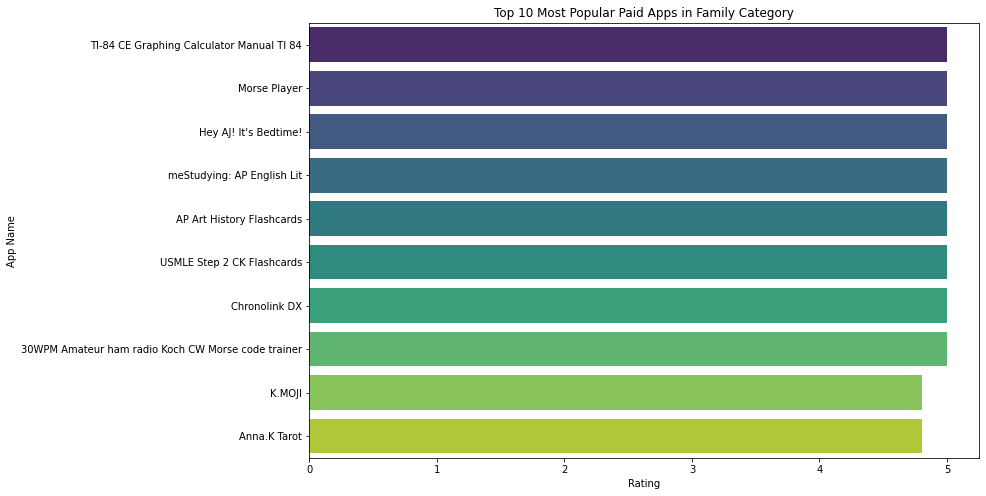

In [14]:
d_F = read_Dataset()
cleaned_Df = clean_dataset(d_F)
paid_app_Fam = most_popuLar_paid_apps_Family_cat(cleaned_Df)

In [15]:
def most_popuLar_genre_Fam(cLeaned_Df):
    # Filter for Family category and paid apps
    fiLtered_pd_Fam_Df = cLeaned_Df[(cLeaned_Df["Category"] == "FAMILY") &
        (cLeaned_Df["Type"] == "Paid")]


    #Group by Genre and sum the number of installations
    genre_By_install = fiLtered_pd_Fam_Df.groupby('Genres')['Installs'].sum().reset_index()

    # Sort the genres by the number of installs in descending order
    genre_By_installs_sorted = genre_By_install.sort_values(by='Installs', ascending=False)

    # Select only the most popular genre
    top_Genre = genre_By_installs_sorted.head(5)

    # Plotting the pie chart for the most popular genre
    plt.figure(figsize=(10, 6))  # Adjust the figure size for a single genre
    plt.pie(top_Genre['Installs'], labels=top_Genre['Genres'], autopct='%1.1f%%', startangle=140)
    plt.title(' 5 Most Popular Genre in Paid Family Apps by Number of Installs')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

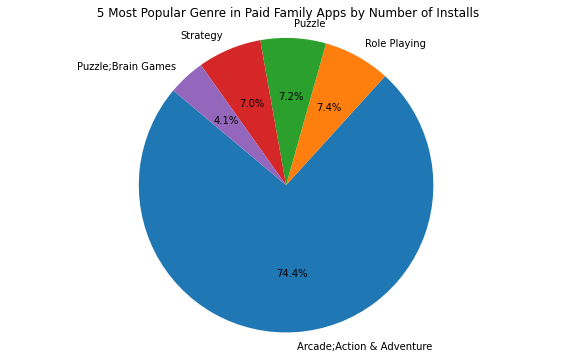

In [16]:
d_F = read_Dataset()
cleaned_Df = clean_dataset(d_F)
fam_app_by_install = most_popuLar_genre_Fam(cleaned_Df)

In [17]:
def no_instaLLation_per_caTegory(cLeaned_Df):
    # Ensure 'Installs' column is numeric
    cLeaned_Df['Installs'] = pd.to_numeric(cLeaned_Df['Installs'], errors='coerce')
    
    # Group by 'Category' and sum the number of installations
    cat_instaLL = cLeaned_Df.groupby('Category')['Installs'].sum().reset_index()
    
    # Convert to a NumPy array of tuples
    instaLLations_array = cat_instaLL.to_numpy()
    
    return instaLLations_array

In [19]:
d_F = read_Dataset()
cleaned_Df = clean_dataset(d_F)
no_install_cat = no_instaLLation_per_caTegory(cleaned_Df)

In [20]:
def plot_No_instaLLation_cat(cLeaned_Df):
     # Ensure 'Installs' column is numeric
    cLeaned_Df['Installs'] = pd.to_numeric(cLeaned_Df['Installs'], errors='coerce')
    
    # Group by 'Category' and sum the number of installations
    cat_instaLLs = cLeaned_Df.groupby('Category')['Installs'].sum().reset_index()

    # Plotting the pie chart
    plt.figure(figsize=(50, 50))
    plt.pie(cat_instaLLs['Installs'], labels=cat_instaLLs['Category'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 30})  # Increase font size)
    plt.title('Distribution of Installations by Genre')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

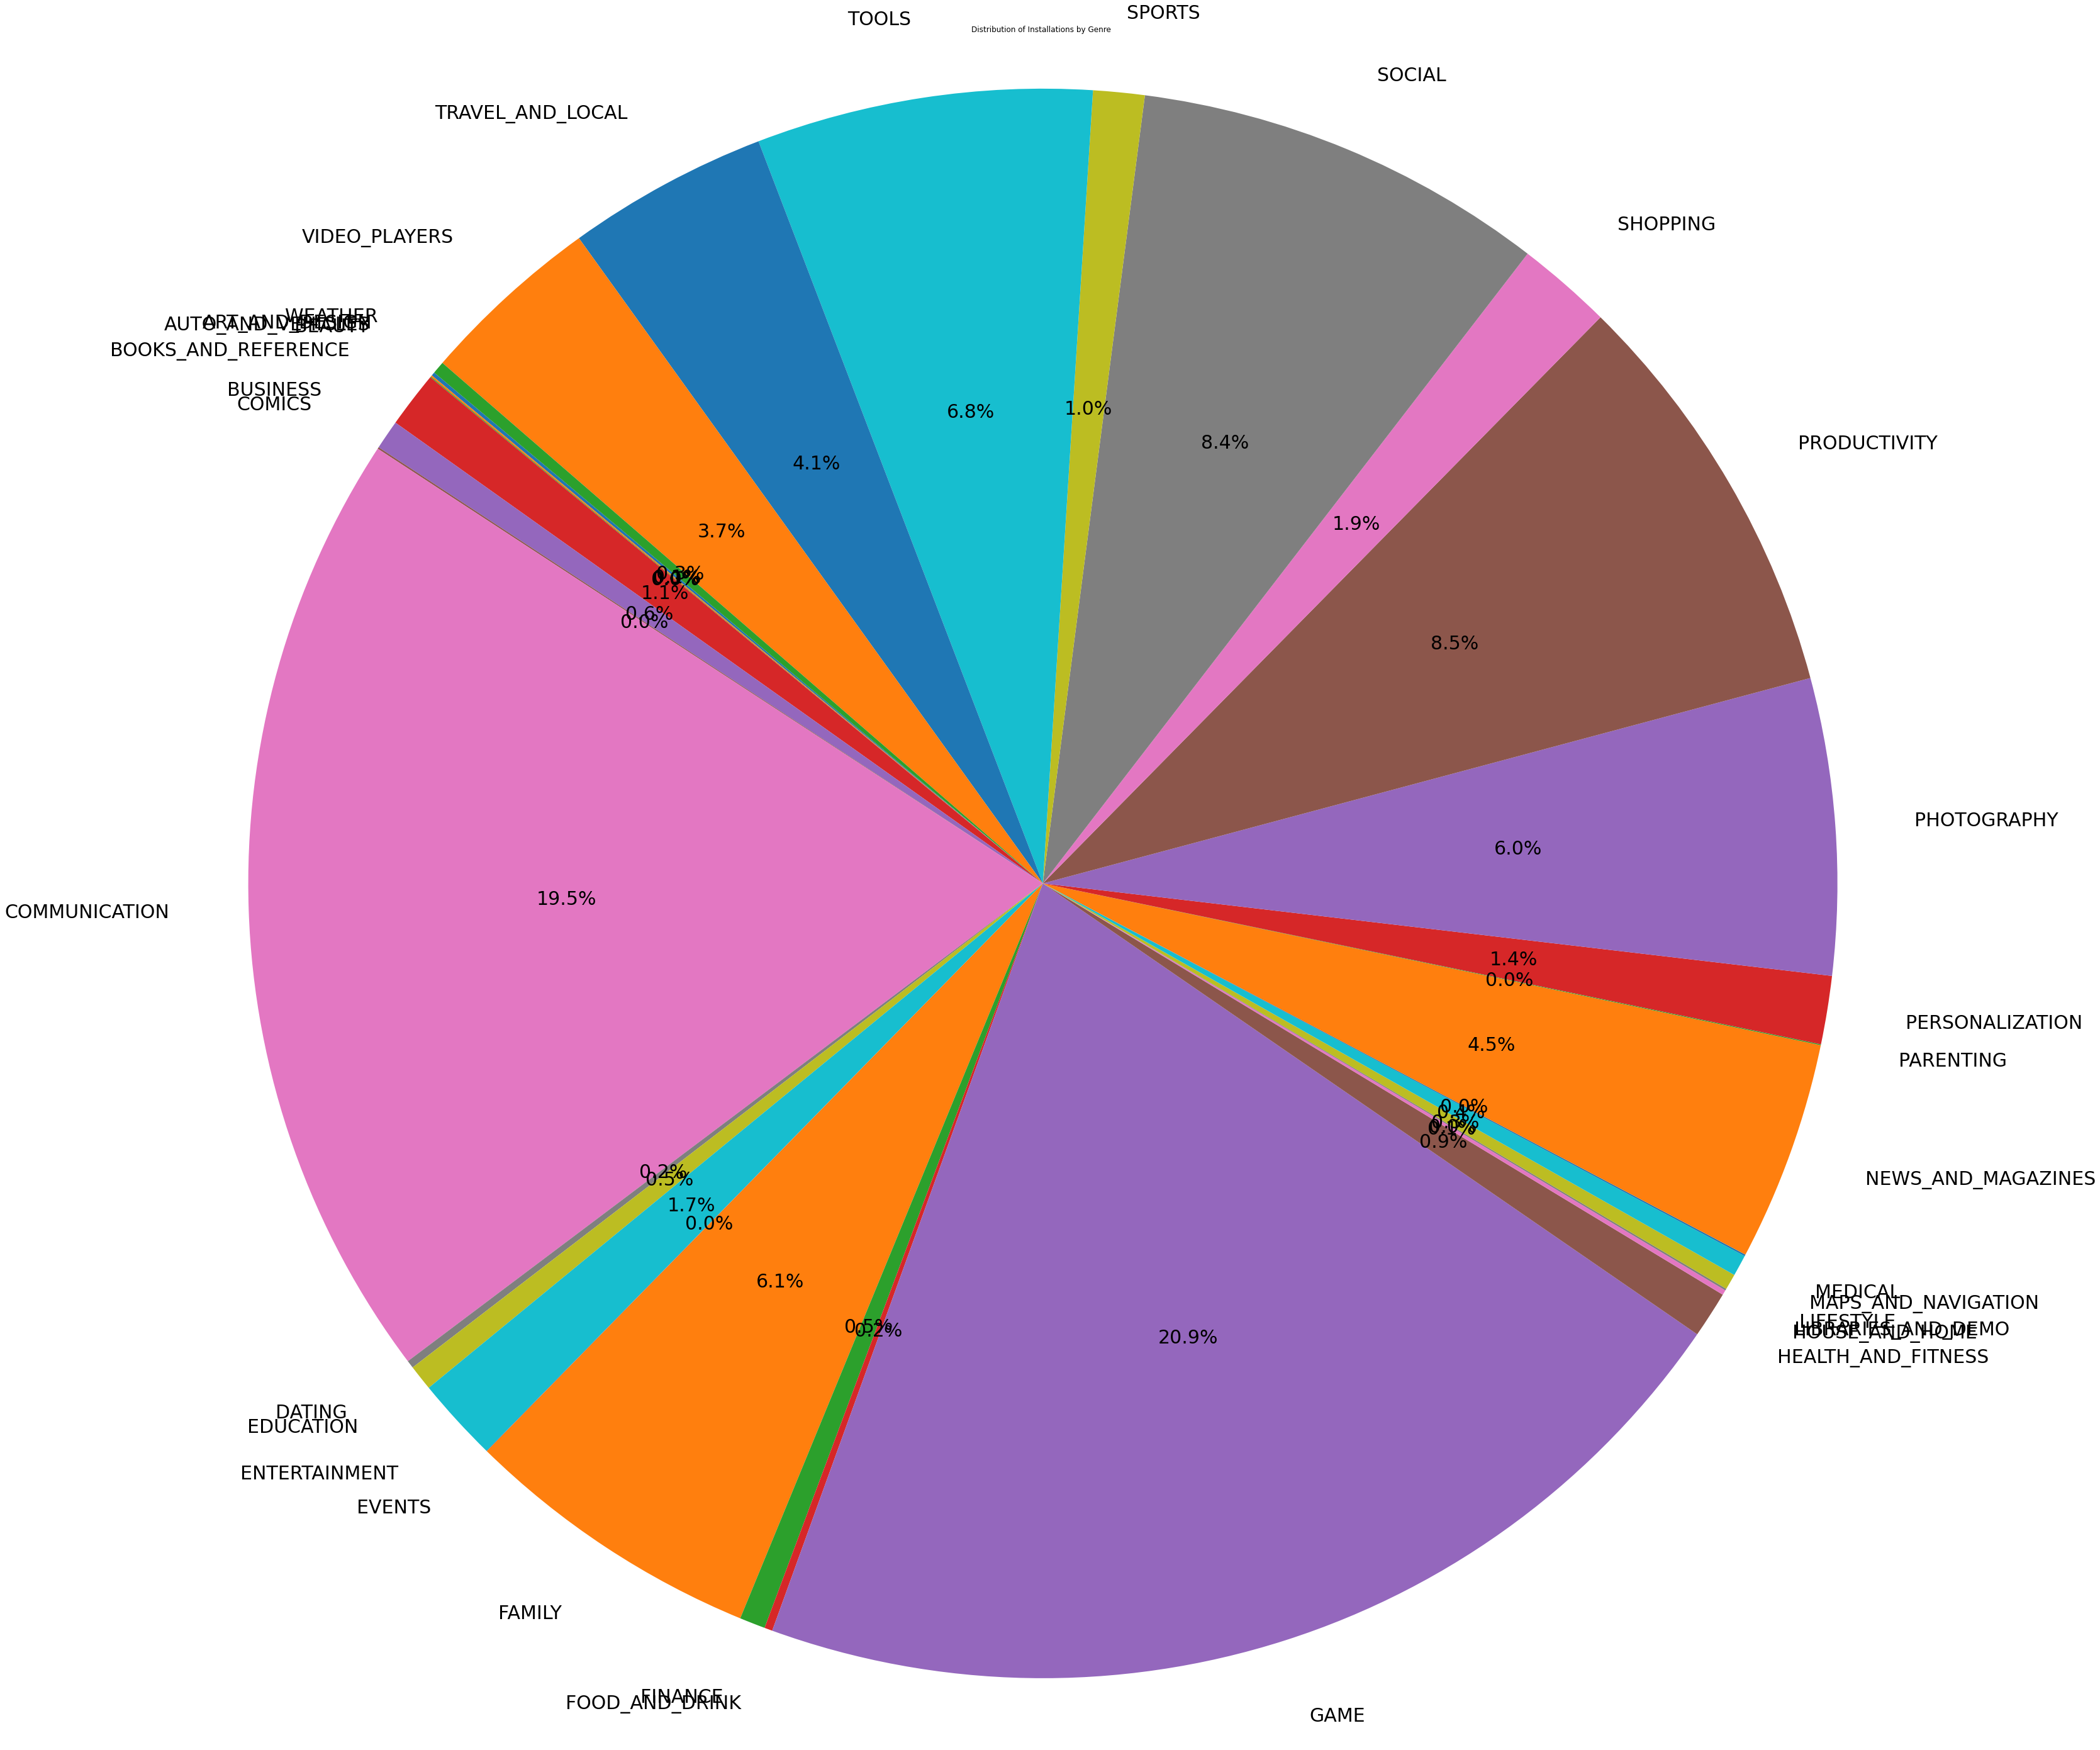

In [21]:
d_F = read_Dataset()
cleaned_Df = clean_dataset(d_F)
no_install = plot_No_instaLLation_cat(cleaned_Df)

In [25]:
def plot_mean_price_cat(cLeaned_Df):
    
    # Calculate mean price per genre
    mn_price_per_Genre = cLeaned_Df.groupby('Category')['Price'].mean().sort_values()

    # Plotting the bar chart
    plt.figure(figsize=(20, 7))
    mn_price_per_Genre.plot(kind='bar', color='green')
    plt.xlabel('Category')
    plt.ylabel('Mean Price')
    plt.title('Mean Price per Genre')
    plt.xticks(rotation=45)  # Rotate genre labels for better readability
    plt.show()

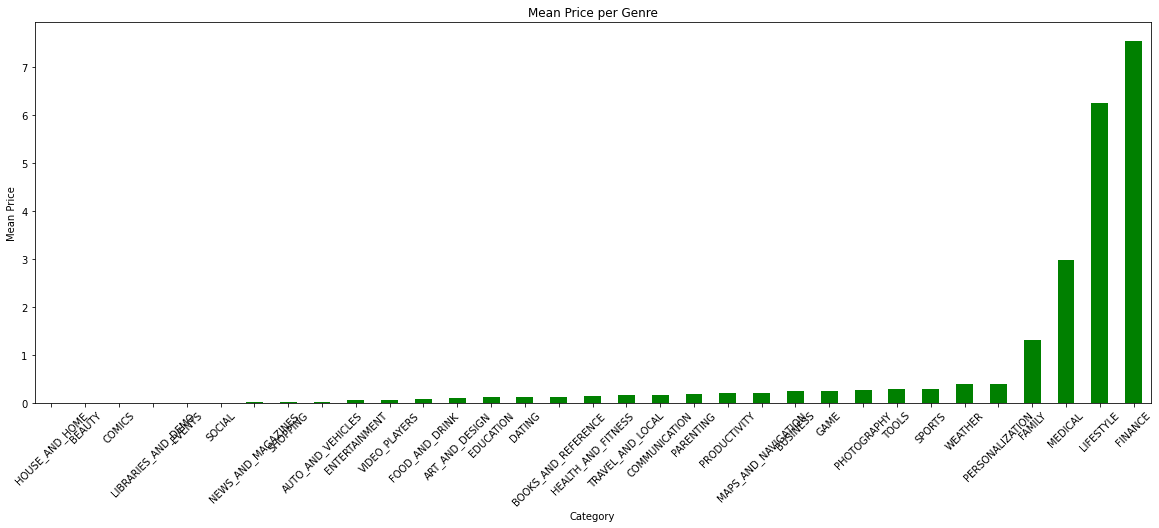

In [26]:
d_F = read_Dataset()
cleaned_Df = clean_dataset(d_F)
mean_price_plot = plot_mean_price_cat(cleaned_Df)

In [27]:
def most_expensive_apps_per_cat(cLeaned_Df):
    # Group by 'Category' and find the index of the most expensive app within each category
    gp_by_cat_price = cLeaned_Df.groupby('Category')['Price'].idxmax()
    
    # Select the rows corresponding to the most expensive apps
    mst_expensive_Apps = cLeaned_Df.loc[gp_by_cat_price]
    
    # Select only 'App' and 'Category' columns
    mst_expensive_Apps = mst_expensive_Apps[['App', 'Category']]
    
     # Reset the index to ensure it's rearranged
    mst_expensive_Apps = mst_expensive_Apps.reset_index(drop=True)
    
    return mst_expensive_Apps


In [28]:
d_F = read_Dataset()
cleaned_Df = clean_dataset(d_F)
most_expensive_apps = most_expensive_apps_per_cat(cleaned_Df)
most_expensive_apps

,App,Category
0,"X Launcher Pro: PhoneX Theme, OS11 Control Center",ART_AND_DESIGN
1,Ulysse Speedometer Pro,AUTO_AND_VEHICLES
2,Hush - Beauty for Everyone,BEAUTY
3,Officiel du SCRABBLE LAROUSSE,BOOKS_AND_REFERENCE
4,SkyTest BU/GU Lite,BUSINESS
5,LINE WEBTOON - Free Comics,COMICS
6,K-@ Mail Pro - Email App,COMMUNICATION
7,AMBW Dating App: Asian Men Black Women Interra...,DATING
8,Fuzzy Numbers: Pre-K Number Foundation,EDUCATION
9,My Talking Pet,ENTERTAINMENT


In [ ]:
#The End